#  Lab 1



##  Hand-Written Digit Recognition

In [30]:
import numpy as np
import pandas as df

from sklearn.model_selection import train_test_split

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

# Evaluation
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score # For evaluating model performance

# Hyperparameters
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')


<h1>Import Digits Data</h1>

In [15]:
from sklearn import datasets, metrics
from sklearn.datasets import load_digits
digits = load_digits()

<h1>See what they look like</h1>

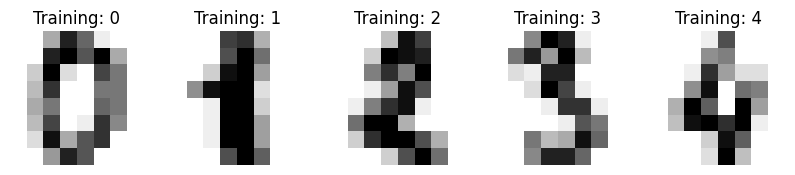

In [16]:
import matplotlib.pyplot as plt
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

<h1>Question 0</h1>

Split the digits.data and digits.target into train and test data. Create a dummy classifier for the digits data, with a strategy of "most_frequent", and print the score on test data. 

In [25]:
# Creating the features vector X and the target vector y.

# Target vector
y = digits.target

# Features matrix
X = digits.data

X.shape

(1797, 64)

In [18]:
# Creating train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Defining dummy classifier for the digits data with strategy of 'most_frequent'

dummy_clf = DummyClassifier(strategy="most_frequent")

# Fitting the model to the training data
dummy_clf.fit(X_train, y_train)

# Predicting y
y_dummy_clf_pred = dummy_clf.predict(X_test)

In [20]:
# Reporting scores on training and testing set 
print("---------- Scores ----------")
print("Accuracy-score on training set: {:.3f}".format(dummy_clf.score(X_train, y_train)))
print("Accuracy-score on test set: {:.3f}\n".format(dummy_clf.score(X_test, y_test)))

---------- Scores ----------
Accuracy-score on training set: 0.107
Accuracy-score on test set: 0.078



<h1>Question 1</h1>
Create a logistic regression model for the digits data and print the score on test data. Use metrics.classification_report to give a more detailed report of results.

In [27]:
# Building initial Logistic Regression Model - all parameters not specified are set to their defaults
logr = LogisticRegression(max_iter=10000, random_state = 42)

# Train - Fitting the model to training set
logr = logr.fit(X_train, y_train)

# Predict target values (y) for new data in test set
y_logr_pred = logr.predict(X_test)

# -- Classification report -- 
# Reporting scores on training and testing set 
print("Accuracy on training set: {:.3f}".format(logr.score(X_train, y_train)))
print("Accuracy on testing set: {:.3f}\n".format(logr.score(X_test, y_test)))

print('Precision-score %.3f' % precision_score(y_test, y_logr_pred))
print('Recall-score %.3f' % recall_score(y_test, y_logr_pred))


Accuracy on training set: 1.000
Accuracy on testing set: 0.972



ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [13]:
# Print classification report after tuning hyperparameters
print(classification_report(y_test,y_logr_pred, digits=4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        33
           1     0.9655    1.0000    0.9825        28
           2     0.9706    1.0000    0.9851        33
           3     0.9706    0.9706    0.9706        34
           4     1.0000    0.9783    0.9890        46
           5     0.9167    0.9362    0.9263        47
           6     0.9714    0.9714    0.9714        35
           7     1.0000    0.9706    0.9851        34
           8     0.9667    0.9667    0.9667        30
           9     0.9744    0.9500    0.9620        40

    accuracy                         0.9722       360
   macro avg     0.9736    0.9744    0.9739       360
weighted avg     0.9726    0.9722    0.9723       360



<h1>Question 2</h1>
Create a 3-way split of the data, using train_test_split. First split into trainval and test, and then split trainval into train and val. 

In [28]:
# In the first step we will split the data in training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

<h1>Question 3</h1>
Create a logistic regression classifier for the digits data. Write a loop that tries at least 4 values ranging from .001 to 1.0 for C. Use the val data to determine the best value. Then train on the combined train and val data, and score the resulting model on test. Use metrics.ConfusionMatrixDisplay.from_predictions to display a confusion matrix for all 10 classes. 

In [29]:
# Applying RandomizedSearchCV for hyperparameter optimization for C

# model
logreg = LogisticRegression()

# parameter grid
parameters = {
    'C'       : range(0.001, 1.0, 0.1),
}
# using GridSearchCV
logr_tuned= GridSearchCV(logreg,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)   

# Fitting model with optimized parameters to training set
logr_tuned.fit(X_train,y_train)

# Identifying the most optimal hyperparameters
logr_tuned[1].best_params_

In [ ]:
# Tuning model with optimized hyperparameters
logr_tuned = LogisticRegression(C= 100.0)

# Train - Fitting model to training set 
logr_tuned.fit(X_train, y_train)

# Predict y using test set
y_logr_pred = logr_tuned.predict(X_test)

# -- Classification report -- 
# Reporting scores on training and testing set 
print("Accuracy on training set: {:.3f}".format(logr_tuned.score(X_valid, y_valid)))
print("Accuracy on testing set: {:.3f}\n".format(logr_tuned.score(X_test, y_test)))

print('Precision-score %.3f' % precision_score(y_test, y_logr_pred))
print('Recall-score %.3f' % recall_score(y_test, y_logr_pred))



<h1>Question 4</h1>
Create a Decision Tree classifier for the digits data. Write a loop that tries values of 1 through 20 for maximum depth. Use the val data to determine the best value. 

<h1>Question 5</h1>
Now train the best decision tree model on the combined train and val data, and score the resulting model on test.  
Use both metrics.classification_report and metrics.ConfusionMatrixDisplay.from_predictions to display the results in detail.


<h1>Question 6</h1>
Create a Random Forest classifier for the digits data. Use the val data to determine the best values for 
<ul>
    <li>number of estimators (from 50 to 500 by 50s)</li>
    <li>Max depth (from 10 to 50 by 10s)</li>
    </ul>
        

<h1>Question 7</h1>
Now train the best random forest model on the combined train and val data, and score the resulting model on test.  

Use both metrics.classification_report and metrics.ConfusionMatrixDisplay.from_predictions to display the results in detail.

# <h1>Question 8</h1>
Create a MLP classifier for the digits data. Use the val data to determine the best values for 
hidden layer sizes. Try values from (10,10) to (210,210), increasing by 50s. You can use two nested loops for variables H1 and H2, and then assign (H1,H2) to the parameter hidden_layer_sizes.
<p> Print the best values for the two hidden layer sizes</p>
    
        

<h1>Question 9</h1>

Now train the best mlp model on the combined train and val data, and score the resulting model on test.  

Use both metrics.classification_report and metrics.ConfusionMatrixDisplay.from_predictions to display the results in detail.